In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn import metrics
import seaborn as sns

In [2]:
train_df = pd.read_csv(r"C:\Users\user\Downloads\titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\user\Downloads\titanic\test.csv")

In [3]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [4]:
print(train_df.describe())
print('-'*50)
print(test_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
--------------------------------------------------
       PassengerId      Pclass

In [5]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
#To standardize the nan columns in Age feature by replace it by simple arthimetic mean
train_df.replace(to_replace=np.nan,value=round(train_df.mean(),0),inplace=True)
train_df.fillna(method='pad',inplace=True)
test_df.replace(to_replace=np.nan,value=round(test_df.mean(),0),inplace=True)
test_df.fillna(method='pad',inplace=True)
print(train_df.info())
print('_'*50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          890 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

In [7]:
print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [8]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [9]:
train_df = train_df.replace({'male':0,'female':1})
test_df = test_df.replace({'male':0,'female':1})
print(train_df.head(1))
print(test_df.head(1))


   PassengerId  Survived  Pclass                     Name  Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris    0  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  
   PassengerId  Pclass              Name  Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James    0  34.5      0      0  330911   

     Fare Cabin Embarked  
0  7.8292   NaN        Q  


In [10]:
#Survived— Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
#Pclass— The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
#Sex— The passenger’s sex
#Age— The passenger’s age in years
#SibSp— The number of siblings or spouses the passenger had aboard the Titanic
#Parch— The number of parents or children the passenger had aboard the Titanic
#Ticket— The passenger’s ticket number
#Fare— The fare the passenger paid
#Cabin— The passenger’s cabin number
#Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

Analyzing the data how our fetures related to statistical concepts
Continuous Variable->Age,Fare
Discrete Variable->SibSp,Parch
Nominal scale->Sex
**Nominal variables are used to 'name' or 'label' a series of values

Ordinal scale->Pclass
**Ordinal scales provide info about the order of choices

Categorial data->Survived,Emarked,Ticket,Cabin
#Lets drop 

In [11]:
#Lets drop the unwanted columns
#since cabin contains maximum of Nan columns so that can be drop 
remove_unwanted_columns = ['Cabin','Ticket','Name','PassengerId','Embarked']
train_df = train_df.drop(remove_unwanted_columns,axis=1)
test_df = test_df.drop(remove_unwanted_columns,axis=1)
print(train_df.columns.values)
print(test_df.columns.values)

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare']
['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare']


In [12]:
print(train_df.shape)
print(test_df.shape)

(891, 7)
(418, 6)


In [13]:
#view of mean 'survived' people on compare with its respected features(Pclass,Sex,SibSp,Parch,Age)
print('Pclass:',train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False))
print('_'*40)
print('Sex:',train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False))
print('_'*40)
print('SibSp:',train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False))
print('_'*40)
print('Parch:',train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False))

Pclass:    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
________________________________________
Sex:    Sex  Survived
1    1  0.742038
0    0  0.188908
________________________________________
SibSp:    SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
________________________________________
Parch:    Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


# **Data Visualization/Exploration

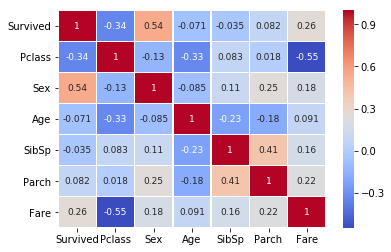

In [14]:
#view of correaltion between features
feature_selection = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
corr = train_df[feature_selection].corr()
sns.heatmap(corr,annot=True,annot_kws={'size':9},linewidths=0.5,xticklabels=feature_selection,
           yticklabels=feature_selection,cmap='coolwarm')

Text(0.5, 0, 'Sex')

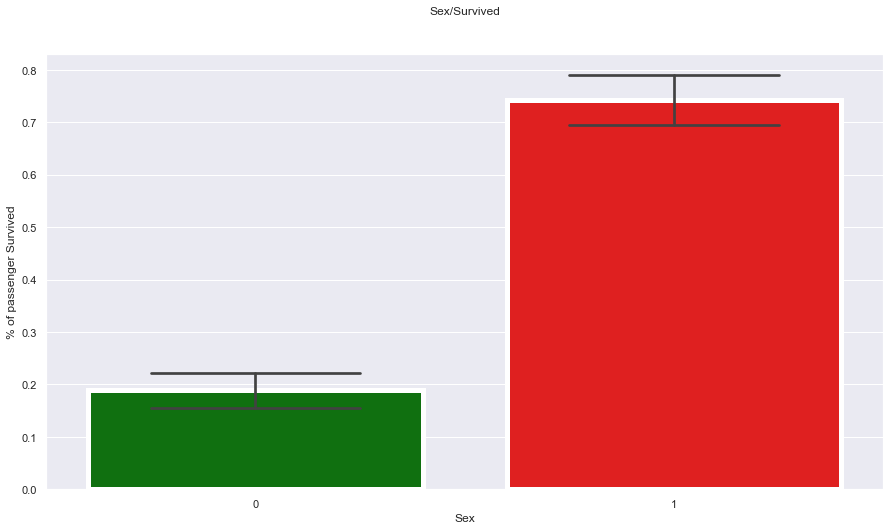

In [15]:
#barplot
#Sex vs Survived
pal = {0:'green',1:'red'}
sns.set(style="darkgrid")
plt.subplots(figsize=(15,8))
ax = sns.barplot(x='Sex',y='Survived',data=train_df,palette=pal,linewidth=5,order=[0,1],capsize=0.5)
plt.title('Sex/Survived',loc='center',pad=40)
plt.ylabel('% of passenger Survived')
plt.xlabel('Sex')

Text(0.5, 0, 'Pclass')

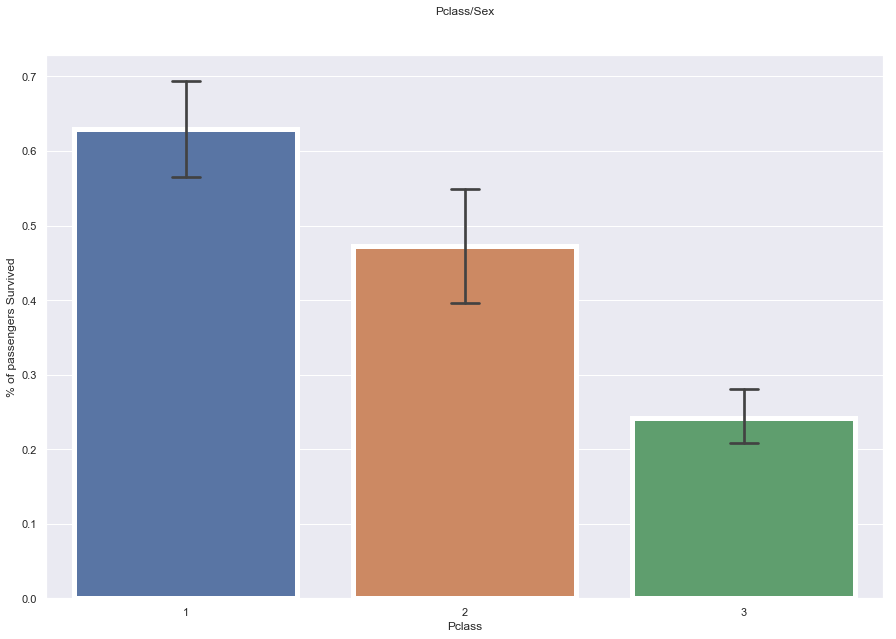

In [16]:
#Pclass vs Survived
plt.subplots(figsize=(15,10))
ax = sns.barplot(x='Pclass',y='Survived',data=train_df,linewidth=5,capsize=0.1)
plt.title('Pclass/Sex',pad=40,loc='center')
plt.ylabel('% of passengers Survived')
plt.xlabel('Pclass')

Text(0.5, 0, 'SibSP')

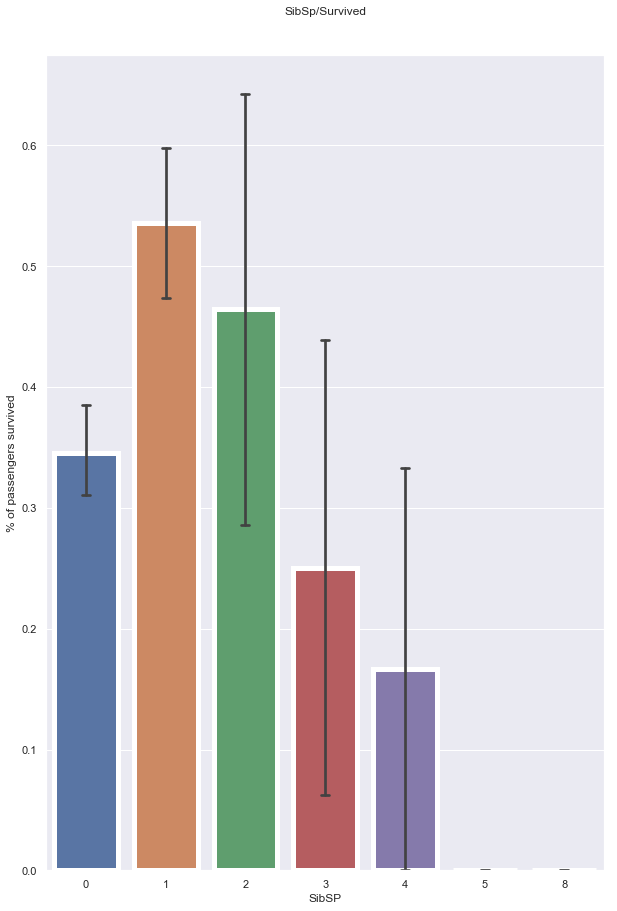

In [17]:
#SibSP vs Survived
sns.set(style='darkgrid')
plt.subplots(figsize=(10,15))
ax = sns.barplot(x='SibSp',y='Survived',data=train_df,linewidth=5,capsize=0.1)
plt.title('SibSp/Survived',loc='center',pad=40)
plt.ylabel('% of passengers survived')
plt.xlabel('SibSP')

Text(0.5, 0, 'Parch')

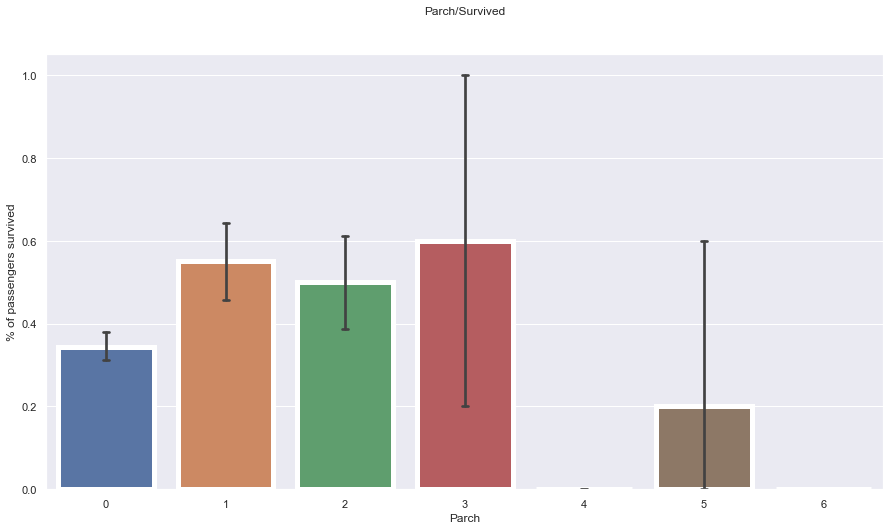

In [18]:
#Parch vs Survived
sns.set(style='darkgrid')
plt.subplots(figsize=(15,8))
ax = sns.barplot(x='Parch',y='Survived',data=train_df,linewidth=5,capsize=.05)
plt.title('Parch/Survived',loc='center',pad=40)
plt.ylabel('% of passengers survived')
plt.xlabel('Parch')

Text(0.5, 0, 'Sex')

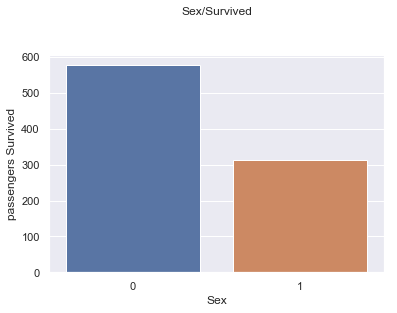

In [19]:
#Sex vs Survived
a = train_df['Sex']
b = train_df['Survived']
sns.countplot(a,label='count')
plt.title('Sex/Survived',loc='center',pad=40)
plt.ylabel('passengers Survived')
plt.xlabel('Sex')

Text(0.5, 0, 'Pclass')

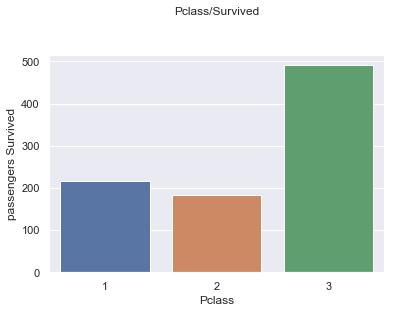

In [20]:
#Pclass vs Survived
a = train_df['Pclass']
b = train_df['Survived']
sns.countplot(a,label='count')
plt.title('Pclass/Survived',loc='center',pad=40)
plt.ylabel('passengers Survived')
plt.xlabel('Pclass')

Text(0.5, 0, 'SibSp')

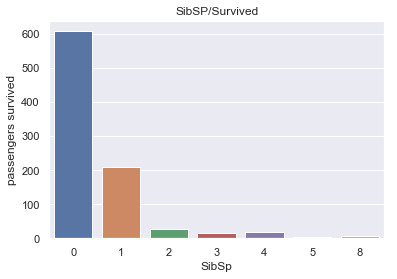

In [21]:
#SibSp
a = train_df['SibSp']
b = train_df['Survived']
sns.countplot(a,label='count')
plt.title('SibSP/Survived')
plt.ylabel('passengers survived')
plt.xlabel('SibSp')

Text(0.5, 0, 'Parch')

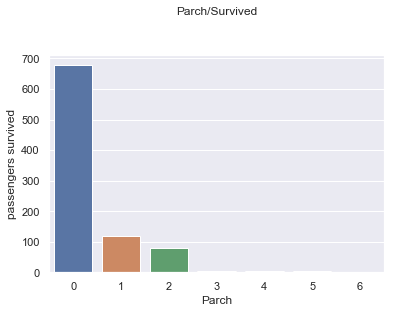

In [22]:
#Parch vs Survived
a = train_df['Parch']
b = train_df['Survived']
sns.countplot(a,label='count')
plt.title('Parch/Survived',loc='center',pad=40)
plt.ylabel('passengers survived')
plt.xlabel('Parch')

Text(0.5, 1.0, 'Testing_data')

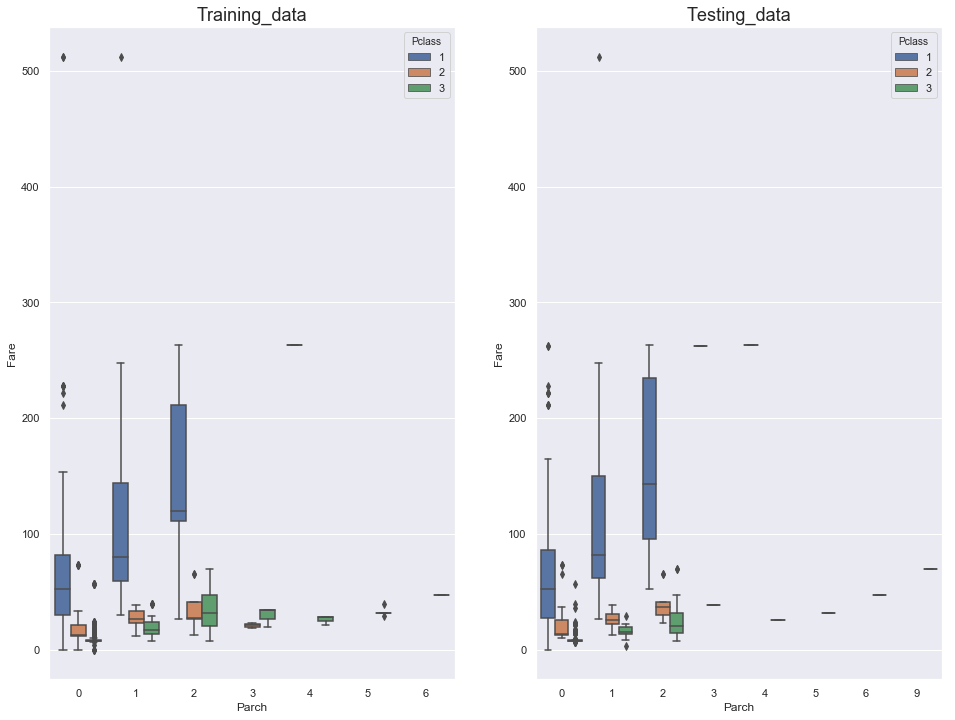

In [23]:
#outlier Detection
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x='Parch',y='Fare',hue='Pclass',data=train_df,ax=ax[0]);
ax2 = sns.boxplot(x='Parch',y='Fare',hue='Pclass',data=test_df,ax=ax[1]);
ax1.set_title('Training_data',fontsize=18)
ax2.set_title('Testing_data',fontsize=18)

In [24]:
#let
X_train = train_df.iloc[:,1:7]
Y_train = train_df.iloc[:,0]

X_test = test_df.iloc[:,]
  
Y_test = pd.read_csv(r"C:\Users\user\Downloads\titanic\gender_submission.csv")    

In [25]:
#MinMaxscaler to normalize the value between 0 and 1
scale = MinMaxScaler(feature_range=(0,1))
scaled_train = scale.fit_transform(X_train)
print('scaled_train:',scaled_train)
print('_'*90)
#Do similar for Test set
scale = MinMaxScaler(feature_range=(0,1))
scaled_test =  scale.fit_transform(X_test)
print('scaled_test:',scaled_test)

scaled_train: [[1.         0.         0.27117366 0.125      0.         0.01415106]
 [0.         1.         0.4722292  0.125      0.         0.13913574]
 [1.         1.         0.32143755 0.         0.         0.01546857]
 ...
 [1.         1.         0.37170143 0.125      0.33333333 0.04577135]
 [0.         0.         0.32143755 0.         0.         0.0585561 ]
 [1.         0.         0.39683338 0.         0.         0.01512699]]
__________________________________________________________________________________________
scaled_test: [[1.         0.         0.4527232  0.         0.         0.01528158]
 [1.         1.         0.61756561 0.125      0.         0.01366309]
 [0.5        0.         0.8153765  0.         0.         0.01890874]
 ...
 [1.         0.         0.50547277 0.         0.         0.01415106]
 [1.         0.         0.39337993 0.         0.         0.01571255]
 [1.         0.         0.39337993 0.125      0.11111111 0.0436405 ]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


65.55023923444976
****************************************
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       266
           1       0.58      0.18      0.28       152

   micro avg       0.66      0.66      0.66       418
   macro avg       0.62      0.55      0.53       418
weighted avg       0.64      0.66      0.59       418

cnf_matrix: [[246  20]
 [124  28]]


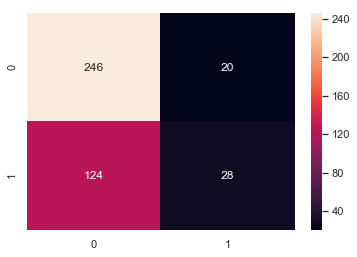

In [26]:
#Now implement the Machine Learning Algorithm ot predict the values and find accuracy
#LogisticRegression
lo_reg = LogisticRegression()
lo_reg.fit(scaled_train,Y_train)
Y_pred = lo_reg.predict(X_test)
#print(Y_pred)
Acc_lo_reg = metrics.accuracy_score(Y_test['Survived'], Y_pred) * 100
print(Acc_lo_reg)
print('*'*40)
#Confusion matrix
print(classification_report(Y_test['Survived'],Y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test['Survived'],Y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')

87.5598086124402
****************************************
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       266
           1       1.00      0.66      0.79       152

   micro avg       0.88      0.88      0.88       418
   macro avg       0.92      0.83      0.85       418
weighted avg       0.90      0.88      0.87       418

cnf_matrix: [[266   0]
 [ 52 100]]


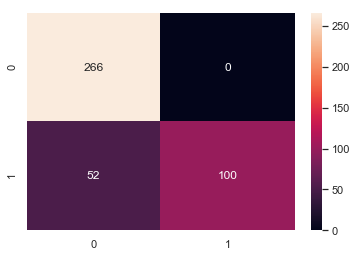

In [27]:
#DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(scaled_train,Y_train)
Y_pred = clf_tree.predict(X_test)
Acc_clf_tree = accuracy_score(Y_test['Survived'],Y_pred)*100
print(Acc_clf_tree)
print('*'*40)
print(classification_report(Y_test['Survived'],Y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test['Survived'],Y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')

58.85167464114832
****************************************
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       266
           1       0.45      0.62      0.52       152

   micro avg       0.59      0.59      0.59       418
   macro avg       0.59      0.59      0.58       418
weighted avg       0.62      0.59      0.60       418

cnf_matrix: [[152 114]
 [ 58  94]]


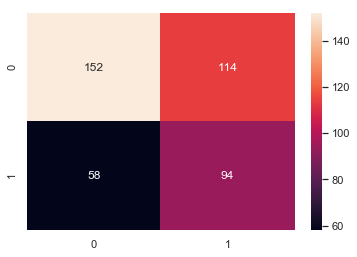

In [28]:
#KNeighborsclassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(scaled_train,Y_train)
Y_pred = clf_knn.predict(X_test)
Acc_clf_knn = accuracy_score(Y_test['Survived'],Y_pred)*100
print(Acc_clf_knn)
print('*'*40)
print(classification_report(Y_test['Survived'],Y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test['Survived'],Y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')

19.85645933014354
****************************************
              precision    recall  f1-score   support

           0       0.35      0.31      0.33       266
           1       0.00      0.00      0.00       152

   micro avg       0.20      0.20      0.20       418
   macro avg       0.18      0.16      0.17       418
weighted avg       0.22      0.20      0.21       418

cnf_matrix: [[ 83 183]
 [152   0]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


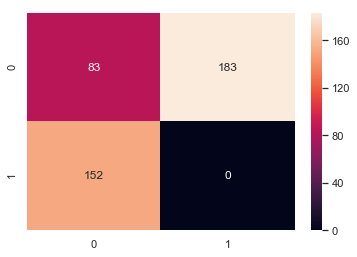

In [29]:
#RandomForestClassfier
clf_random = RandomForestClassifier()
clf_random.fit(scaled_train,Y_train)
Y_pred = clf_random.predict(X_test)
Acc_clf_random = accuracy_score(Y_test['Survived'],Y_pred)*100
print(Acc_clf_random)
print('*'*40)
print(classification_report(Y_test['Survived'],Y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test['Survived'],Y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')

34.21052631578947
****************************************
              precision    recall  f1-score   support

           0       0.47      0.28      0.35       266
           1       0.26      0.45      0.33       152

   micro avg       0.34      0.34      0.34       418
   macro avg       0.37      0.36      0.34       418
weighted avg       0.40      0.34      0.34       418

cnf_matrix: [[ 75 191]
 [ 84  68]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


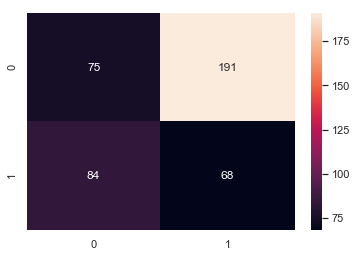

In [30]:
#Support vector machine
clf_svm = RandomForestClassifier()
clf_svm.fit(scaled_train,Y_train)
Y_pred = clf_svm.predict(X_test)
Acc_clf_svm = accuracy_score(Y_test['Survived'],Y_pred)*100
print(Acc_clf_svm)
print('*'*40)
print(classification_report(Y_test['Survived'],Y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test['Survived'],Y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')

36.36363636363637
****************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       266
           1       0.36      1.00      0.53       152

   micro avg       0.36      0.36      0.36       418
   macro avg       0.18      0.50      0.27       418
weighted avg       0.13      0.36      0.19       418

cnf_matrix: [[  0 266]
 [  0 152]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


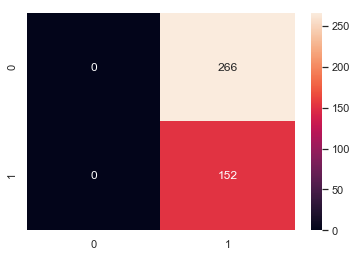

In [31]:
#GaussianNB
clf_naive = GaussianNB()
clf_naive.fit(scaled_train,Y_train)
Y_pred = clf_naive.predict(X_test)
Acc_clf_naive = accuracy_score(Y_test['Survived'],Y_pred)*100
print(Acc_clf_naive)
print('*'*40)
print(classification_report(Y_test['Survived'],Y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test['Survived'],Y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')

64.5933014354067
****************************************
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       266
           1       0.52      0.30      0.38       152

   micro avg       0.65      0.65      0.65       418
   macro avg       0.60      0.57      0.57       418
weighted avg       0.62      0.65      0.62       418

cnf_matrix: [[224  42]
 [106  46]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


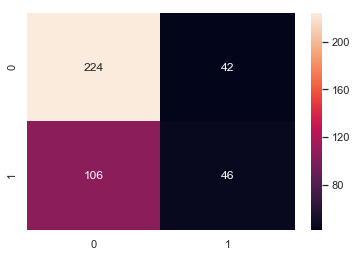

In [32]:
#SGDClassifier
clf_SGD = SGDClassifier()
clf_SGD.fit(scaled_train,Y_train)
Y_pred = clf_SGD.predict(X_test)
Acc_clf_SGD = accuracy_score(Y_test['Survived'],Y_pred)*100
print(Acc_clf_SGD)
print('*'*40)
print(classification_report(Y_test['Survived'],Y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test['Survived'],Y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')

In [33]:
models = pd.DataFrame({
    'Model': ['lo_reg','clf_tree','clf_knn','clf_naive','clf_svm','clf_random','clf_SGD'],
    'Score': [Acc_lo_reg,Acc_clf_tree,Acc_clf_knn,Acc_clf_naive,Acc_clf_svm,
              Acc_clf_random,Acc_clf_SGD]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,clf_tree,87.559809
0,lo_reg,65.550239
6,clf_SGD,64.593301
2,clf_knn,58.851675
3,clf_naive,36.363636
4,clf_svm,34.210526
5,clf_random,19.856459


In [34]:
submission = pd.DataFrame({
        "PassengerId": Y_test["PassengerId"],
        "Survived": Y_pred
    })
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         0
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         0
15           907         0
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         0
22           914         0
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         1
390         1282         1
391         1283         0
392         1284         0
3